# Multivariate evolution

Gabriel Marroig and Diogo Melo

14/09/2016

In this tutorial we explore the consequences of genetic covariation for multivariate evolution using a toy dataset measured in 5 related species rodent species, named A to E. In the dataset we have 4 quantitative trais (Humer, Ulna, Tibia and Femur). Each species have a sample size of $N = 60$. We will use this dataset to illustrate several points related to multivariate evolution and data analyses.

As usual, first we need to install a few packages

In [1]:
list_pkgs <- c("evolqg","reshape2","plyr","ggplot2","lattice", "GGally")
new_pkgs <- list_pkgs[!(list_pkgs %in% installed.packages()[,"Package"])]
if(length(new_pkgs) > 0){ install.packages(new_pkgs) }

library(evolqg)
library(reshape2)
library(plyr)
library(ggplot2)
library(lattice)
library(GGally)
library(MASS)
library(scales)

Loading required package: plyr


Fortunately, the dataset we are going to use is included in the evolqg package, so we can just load it into our workspace using the data function.

In [2]:
data(dentus)

This creates a data.frame in the workspace names dentus with all the data we need.

In [3]:
dentus

humerus,ulna,femur,tibia,species
3.214619,8.036072,13.51779,19.01131,A
5.222875,10.838375,15.54714,21.01718,A
5.193021,11.911770,17.24719,22.43190,A
6.547400,11.293085,14.89040,20.17706,A
4.724383,9.897135,14.81104,19.59753,A
4.630147,9.441174,15.24754,19.25937,A
6.771560,11.905400,15.57164,22.06777,A
5.229635,9.881575,13.98772,19.05881,A
4.786389,10.020607,15.67659,19.62829,A
4.171654,8.998204,15.52306,20.06622,A


First, let's visualize the data by making simple graphs (scatterplots) of all the traits in the dataset with different symbol and colors for all species. There should be a total of 6 graphs (Trait 1 x 2, 1 x 3, and so on).  It can also be represented as a scatterplot matrix:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


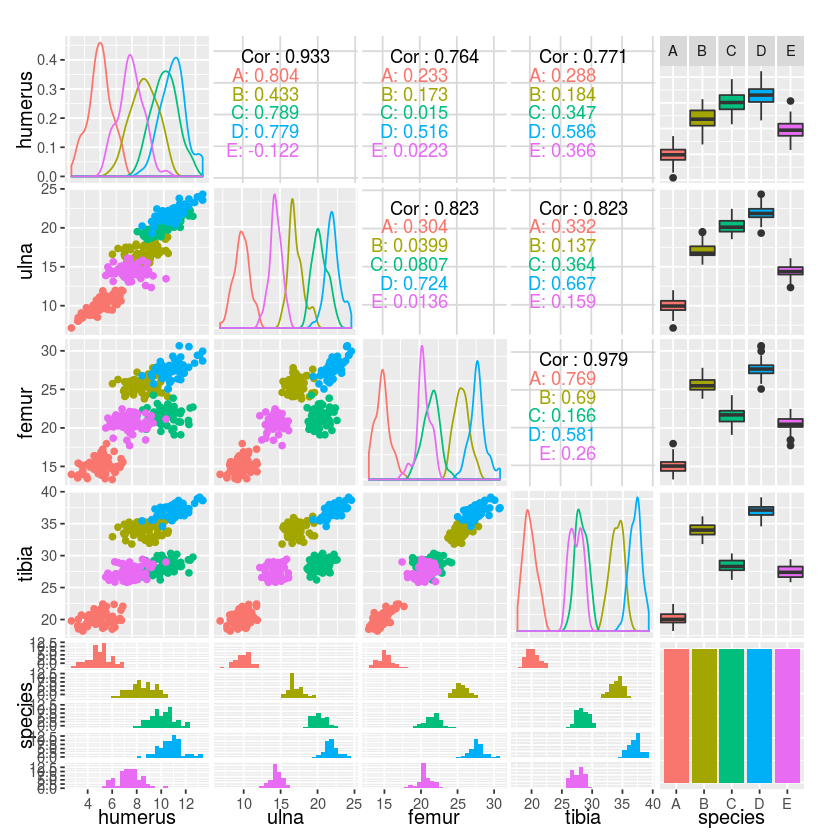

In [4]:
ggpairs(dentus,  mapping = aes(color = species), columns = c("humerus", "ulna","femur", "tibia", "species"))

There is a lot of information on these graphs. What can you see in terms of association between traits within each species? Are they similar? Are there differences? The graphs also give you information about the size differences between species. 

## Principal components and discriminant analysis

Let us examine now how the variation within-groups (species) and between-groups is distributed. One common method to summarize or transform variation in several traits into fewer number of variables is principal component analysis (PCA). Usually, a system with 30-40 traits can be represented by a much smaller number of principal components, say 2 to 7. These principal components are composite traits using all the original traits, but unlike the original traits, they are uncorrelated to each other.

If you know some linear algebra, the pincipal components are the eigenvectors of the covariance matrix between the traits. The eigenvalues are the variances in the dataset in the direction of the corresponding eigenvector. If you don't know linear algebra, here is a figure to ilustrate a principal componente in two dimensions.

![](https://github.com/lem-usp/apostila-bio-evol/blob/master/figuras/auto-vetores.png?raw=true)

Also, take a look at this [great tutorial on PCA](http://setosa.io/ev/principal-component-analysis/)

Let's extract the first 2 principal components from this dataset and then plot the two new variables and examine the distribution of points and species on it. What can you see in this graph in regard to the distribution of variation within and between groups?

In [5]:
# PCA is the eigenvalues of the covariance matrix, so let's calcualte the covariance matrix for the full dataset
fullcov = cov(dentus[,1:4])
fullcov

,humerus,ulna,femur,tibia
humerus,5.246708,9.336696,7.851466,10.44042
ulna,9.336696,19.102111,16.135152,21.28146
femur,7.851466,16.135152,20.106820,25.94645
tibia,10.440416,21.281457,25.946449,34.96317


In [6]:
#Now we take the eigen decomposition:
eigen_fullcov = eigen(fullcov)
eigen_fullcov$values

[1] 72.6260356  5.7058355  0.5916980  0.4952409

In [7]:
# These coluns are all the PCs
eigen_fullcov$vectors

-0.2302141,0.4138996,0.6109147,-0.6344067
-0.4663372,0.7473891,-0.3214898,0.3472514
-0.5145071,-0.3053580,-0.5708807,-0.5622580
-0.6817723,-0.4205392,0.4444353,0.4010120


In [8]:
# We can use these PCs to project the original dataset and get the scores for each individual in the PCs
dentus_fullPCscores = as.matrix(dentus[,1:4]) %*% eigen_fullcov$vectors

# These must be uncorrelated, so all correlation should be zero
round(cor(dentus_fullPCscores), 5)

1,0,0,0
0,1,0,0
0,0,1,0
0,0,0,1


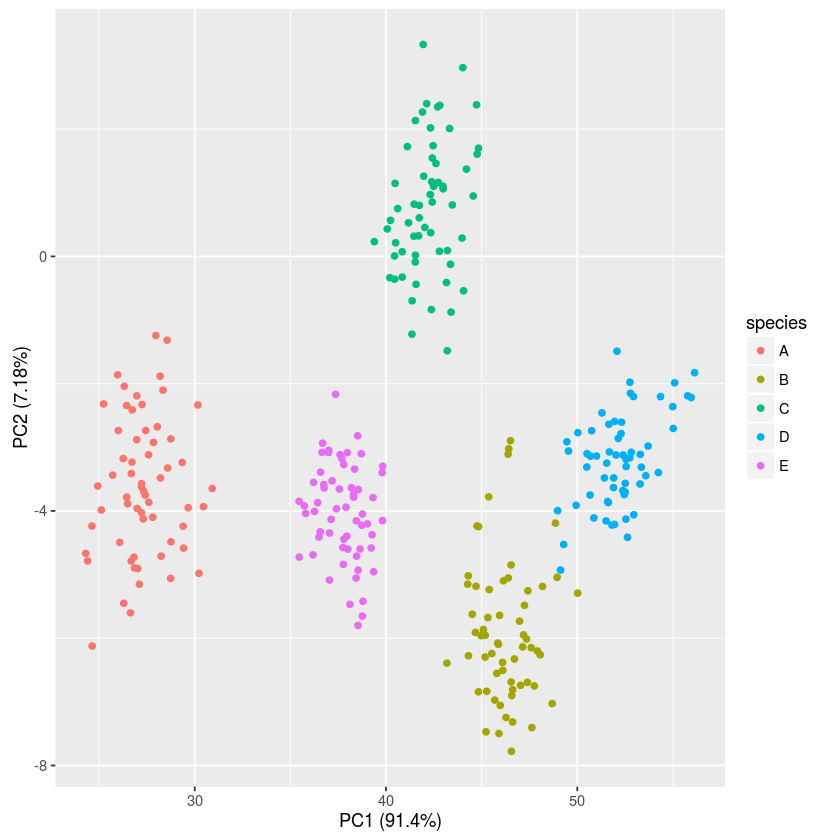

In [9]:
# Now the plot of the frist two principal components
ggplot(data.frame(PC1 = dentus_fullPCscores[,1], PC2 = dentus_fullPCscores[,2], species = dentus$species), 
       aes(-PC1, PC2, color = species)) + geom_point() +
 labs(x = paste("PC1 (", percent(eigen_fullcov$values[1]/sum(eigen_fullcov$values)), ")", sep=""),
       y = paste("PC2 (", percent(eigen_fullcov$values[2]/sum(eigen_fullcov$values)), ")", sep=""))

Now run a discriminant analyses with all 5 species as grouping (independent) variable and the 4 quantitative as predictor variables and plot the first discriminant function against the second one. Notice how both methods rotate the axis to find solutions to the problem. In the principal components you maximize the variance captured by each variable while on the DF you maximize the differences between groups while controlling for the variation within each group.

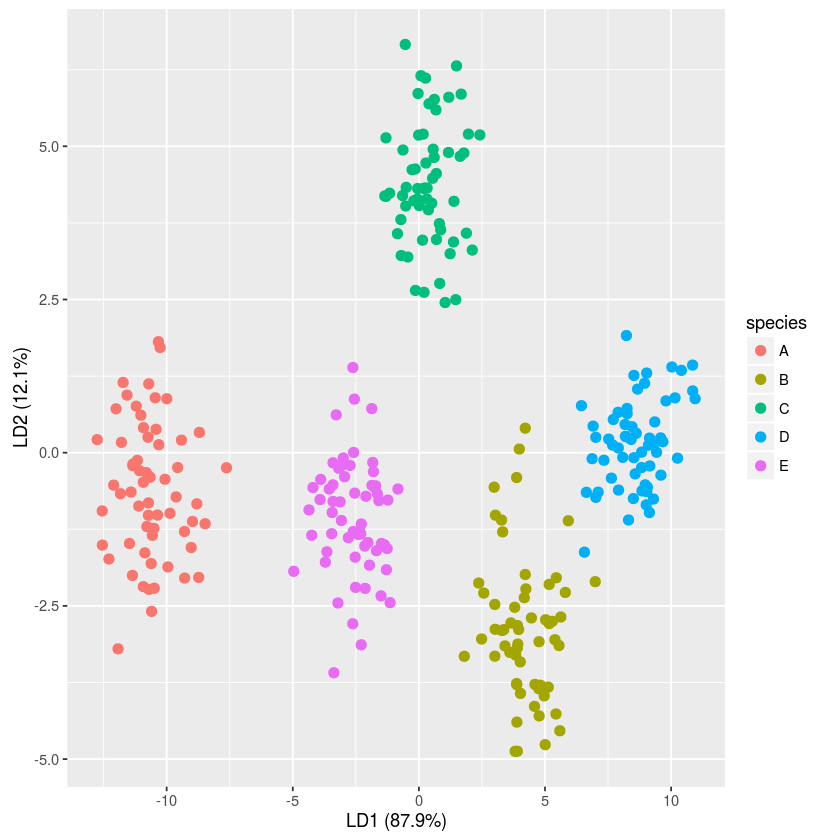

In [10]:
lda <- lda(species ~ ., 
           dentus, 
           prior = c(1,1,1,1,1)/5)

prop.lda = lda$svd^2/sum(lda$svd^2)

plda <- predict(object = lda,
                newdata = dentus)

dataset = data.frame(species = dentus[,"species"], lda = plda$x)

ggplot(dataset) + geom_point(aes(lda.LD1, lda.LD2, colour = species), size = 2.5) + 
  labs(x = paste("LD1 (", percent(prop.lda[1]), ")", sep=""),
       y = paste("LD2 (", percent(prop.lda[2]), ")", sep=""))

## Response to selection

Now let’s turn our attention to the species Matrices and how traits are associated within each one of them. 

Compute the correlation matrix (all 6 pairs of correlation) for each species. For our discussion here this matrix is very similar to the variance/covariance matrix so for sake of comparison we will use the correlation (all traits have very similar variance except for one in one species). 

In [11]:
# We can calculate the within species matrix by subsettting the original data.frame for each matrix:
corA = cor(dentus[dentus$species == "A", 1:4])
corB = cor(dentus[dentus$species == "B", 1:4])
corC = cor(dentus[dentus$species == "C", 1:4])
corD = cor(dentus[dentus$species == "D", 1:4])
corE = cor(dentus[dentus$species == "E", 1:4])

#now let's group them in a list
cor_mats = list(A = corA, B = corB, C = corC, D = corD, E = corE)
cor_mats

,humerus,ulna,femur,tibia
humerus,1.0000000,0.8042349,0.2332436,0.2880717
ulna,0.8042349,1.0000000,0.3038286,0.3321251
femur,0.2332436,0.3038286,1.0000000,0.7690596
tibia,0.2880717,0.3321251,0.7690596,1.0000000
,humerus,ulna,femur,tibia
humerus,1.0000000,0.43328569,0.17293372,0.1840682
ulna,0.4332857,1.00000000,0.03990535,0.1373924
femur,0.1729337,0.03990535,1.00000000,0.6896008
tibia,0.1840682,0.13739244,0.68960082,1.0000000
,humerus,ulna,femur,tibia


Do species have the same correlation structure (patterns and magnitude of correlation)? How would that structure affect the evolutionary potential of each species? To anwser these questions we will simulate a 1000 random vectors of selection and multiply each species matrix by these vectors. Doing this we obtain 1000 response vectors produced by this simulated selection.

In [12]:
random_betas = matrix(rnorm(1000*4), 4, 1000)
response_list = lapply(cor_mats, function(x) x %*% random_betas)

# These are the simulated responses
    
response_list

humerus,-1.14099284,-0.1883734,-1.2540819,-1.381014004,-0.11914795,0.03330095,0.8038504,0.1392236,-0.03266546,0.2079171,⋯,0.2230153,2.055158,-2.30324583,-0.14079806,1.2537720,1.3031486,-0.01874202,-1.0074201,1.566353,-0.5335867
ulna,-0.45350953,-0.3840148,-0.8255316,-1.286139801,0.09934686,0.05631555,0.6801913,-0.2120091,-0.70873021,0.3661600,⋯,0.2020056,1.897134,-2.05543199,-0.07243489,1.3009139,1.3641062,0.02895108,-0.8760472,1.063944,-0.8703976
femur,-0.21099889,-1.1725685,0.2374140,-0.004089886,-0.54670090,0.87153843,-0.4049669,-0.8207769,-0.96320792,0.5610071,⋯,-1.4434434,1.458922,-0.35600840,0.80209491,0.8040912,0.1606829,0.66459777,0.1749017,3.259793,0.3774549
tibia,0.01720173,-0.9772345,-0.5619862,-0.320870463,-0.57854224,0.94949138,-0.3523081,-0.5969969,-0.73999399,0.8719068,⋯,-1.1617550,1.358210,-0.07786647,0.44935321,1.0914586,0.3093737,0.53487853,-0.5466108,3.678931,0.3830261
humerus,-1.66690819,-0.006749011,-1.3476313,-1.1544139,-0.3449041,0.02679877,0.7439057,0.4280438,0.6340509,-0.01802406,⋯,0.1107840,1.856022,-2.1243696,-0.1135449,0.9367979,0.95142892,-0.02546678,-0.8469855,1.850636,-0.04672009
ulna,0.41339156,-0.197230080,-0.3944619,-1.0477548,0.4724415,-0.16726282,0.5823611,-0.3101104,-1.0508427,0.35405843,⋯,0.5853025,1.070629,-1.4124822,-0.2450507,0.9830258,1.22480568,-0.12221076,-0.7317919,-0.496346,-1.22748211
femur,-0.48025605,-1.104868157,0.3414957,0.2454995,-0.6858986,0.88304234,-0.5066842,-0.7023580,-0.6138285,0.40065440,⋯,-1.5914471,1.264732,-0.1439077,0.8830445,0.5342258,-0.13806732,0.69289120,0.4054015,3.384931,0.70964657
tibia,0.04632588,-0.878382305,-0.6128170,-0.1583503,-0.6478991,0.97668656,-0.4624013,-0.4932187,-0.5064946,0.85961855,⋯,-1.1849264,1.055614,0.3081406,0.4100646,0.9254111,0.08453301,0.51816759,-0.5358056,3.726694,0.59927683
humerus,-0.9790343,0.02364498,-1.706312,-1.5452955,-0.08538409,-0.0003155997,0.86135227,0.33180560,0.1702235,0.33159756,⋯,0.5056387,1.8521279,-2.0959176,-0.4065017,1.33340838,1.3621098,-0.1491579,-1.415715,1.4942502,-0.5630667
ulna,-0.2526109,-0.17061864,-1.214820,-1.4386137,0.16688350,-0.0027409746,0.74345496,-0.03885739,-0.5509261,0.47263199,⋯,0.5074940,1.6692965,-1.8579388,-0.3348869,1.35983355,1.4292148,-0.1078631,-1.246918,0.8544965,-0.9446154
femur,-0.4477064,-1.05895955,1.392570,0.5670172,-0.34258103,0.4835169351,-0.41302616,-0.87009182,-0.9210693,-0.09821039,⋯,-1.4240893,0.9940673,-0.4779580,1.0727580,0.02538125,-0.2228624,0.6448060,1.244105,1.5572383,0.3313558


We can now relate the structure of the correlation matrix with those responses calculating a series of statistics:

- Correlation between selection vector x response vector
- Correlation between response vector x PC1 (first principal component of each species)
- Correlation between response vector x PC2 (second principal component of each species)

In [13]:
# First we need a vector correlation funcion:
corVector = function(x, y) x %*% y / (Norm(x) * Norm(y))

# And a function that calculates the vector correlation between the columns of two matrices:
corColumns = function(x, y){
    n = ncol(x)
    correlations = numeric(n)
    for(i in 1:n)
        correlations[i] = corVector(x[,i], y[,i])
    return(correlations)
}
    
# And a function that calculates the vector correlation between the columns of a matrix and a vector:
corColumnVector = function(x, vector){
    n = ncol(x)
    correlations = numeric(n)
    for(i in 1:n)
        correlations[i] = corVector(x[,i], vector)
    return(correlations)
}

In [14]:
# Correlation between selection vector ($\beta$) x response vector $\delta z$
cor_beta_dz = lapply(response_list, corColumns, random_betas)

# Correlation between response vector x PC1 (first principal component of each species)
species = list("A", "B", "C", "D", "E")
cor_dz_PC1 = lapply(species, function(sp) abs(corColumnVector(response_list[[sp]], eigen(cor_mats[[sp]])$vector[,1])))
names(cor_dz_PC1) = species
    
# Correlation between response vector x PC1 (first principal component of each species)
cor_dz_PC2 = lapply(species, function(sp) abs(corColumnVector(response_list[[sp]], eigen(cor_mats[[sp]])$vector[,2])))
names(cor_dz_PC2) = species
    
# We can joint all these correlation in a data.frame
corelation_df = NULL
for(sp in species){
    corelation_df = rbind(corelation_df, 
                      data.frame(beta_dz = cor_beta_dz[[sp]], 
                                 dz_PC1 = cor_dz_PC1[[sp]], 
                                 dz_PC2 = cor_dz_PC2[[sp]], 
                                 species = sp))
}

Now make a graph for each species of the correlation between PC1 x response vector in the x-axis and response vector x pc2 on the y-axis. Do you see any differences in the potential of responses for each species? Which species is most “constrained”  or limited and the potential responses? Does that make sense when you look at the association between the 4 traits?

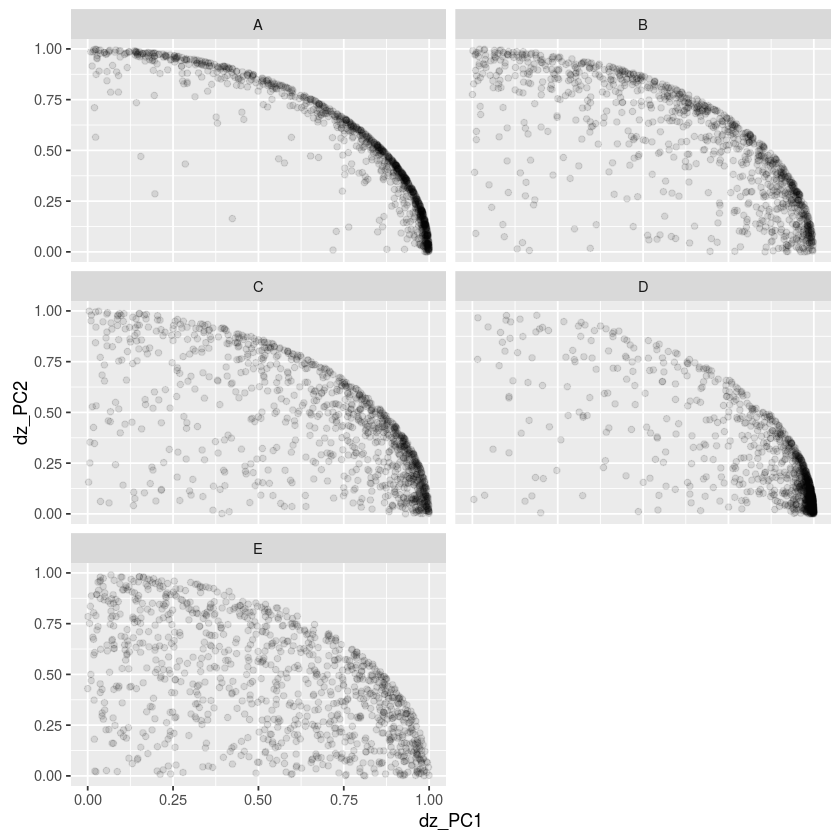

In [15]:
ggplot(corelation_df, aes(dz_PC1, dz_PC2)) + geom_point(alpha = 0.1) + facet_wrap(~species, ncol = 2)

We can also look at the distribution of the aligmente between the response and the selection for each species

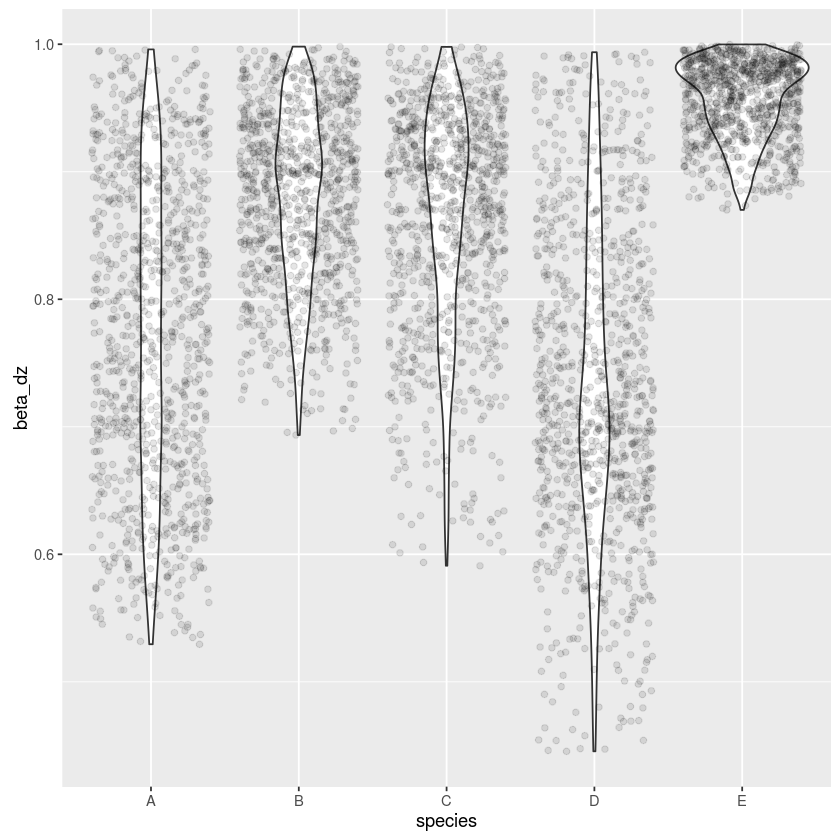

In [16]:
ggplot(corelation_df, aes(species, beta_dz)) + geom_violin() + geom_jitter(alpha = 0.1)